In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from scipy.stats import truncnorm


In [4]:
def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [5]:
def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
  res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
  return res.rvs(num)


In [6]:
def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
  res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
  return res.rvs(num).astype(np.uint8)

In [7]:
# number of items for each flower class:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}

In [8]:
# flos Pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data

In [9]:
# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data

In [10]:
# flos Margarita:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data

In [11]:
# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,
num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,
num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data


In [12]:
data = np.concatenate((flowers["flos_pythonem"],
flowers["flos_java"],
flowers["flos_margarita"],
flowers["flos_artificialis"]
), axis=0)


In [15]:
# assigning the labels
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
  num = number_of_items_per_class[i-1]
  beg = previous_end
  target[beg: beg + num] += i
  previous_end = beg + num
conc_data = np.concatenate((data, target.reshape(target.shape[0],
1)),
axis=1)
np.savetxt("data/strange_flowers.txt", conc_data, fmt="%2.2f",)

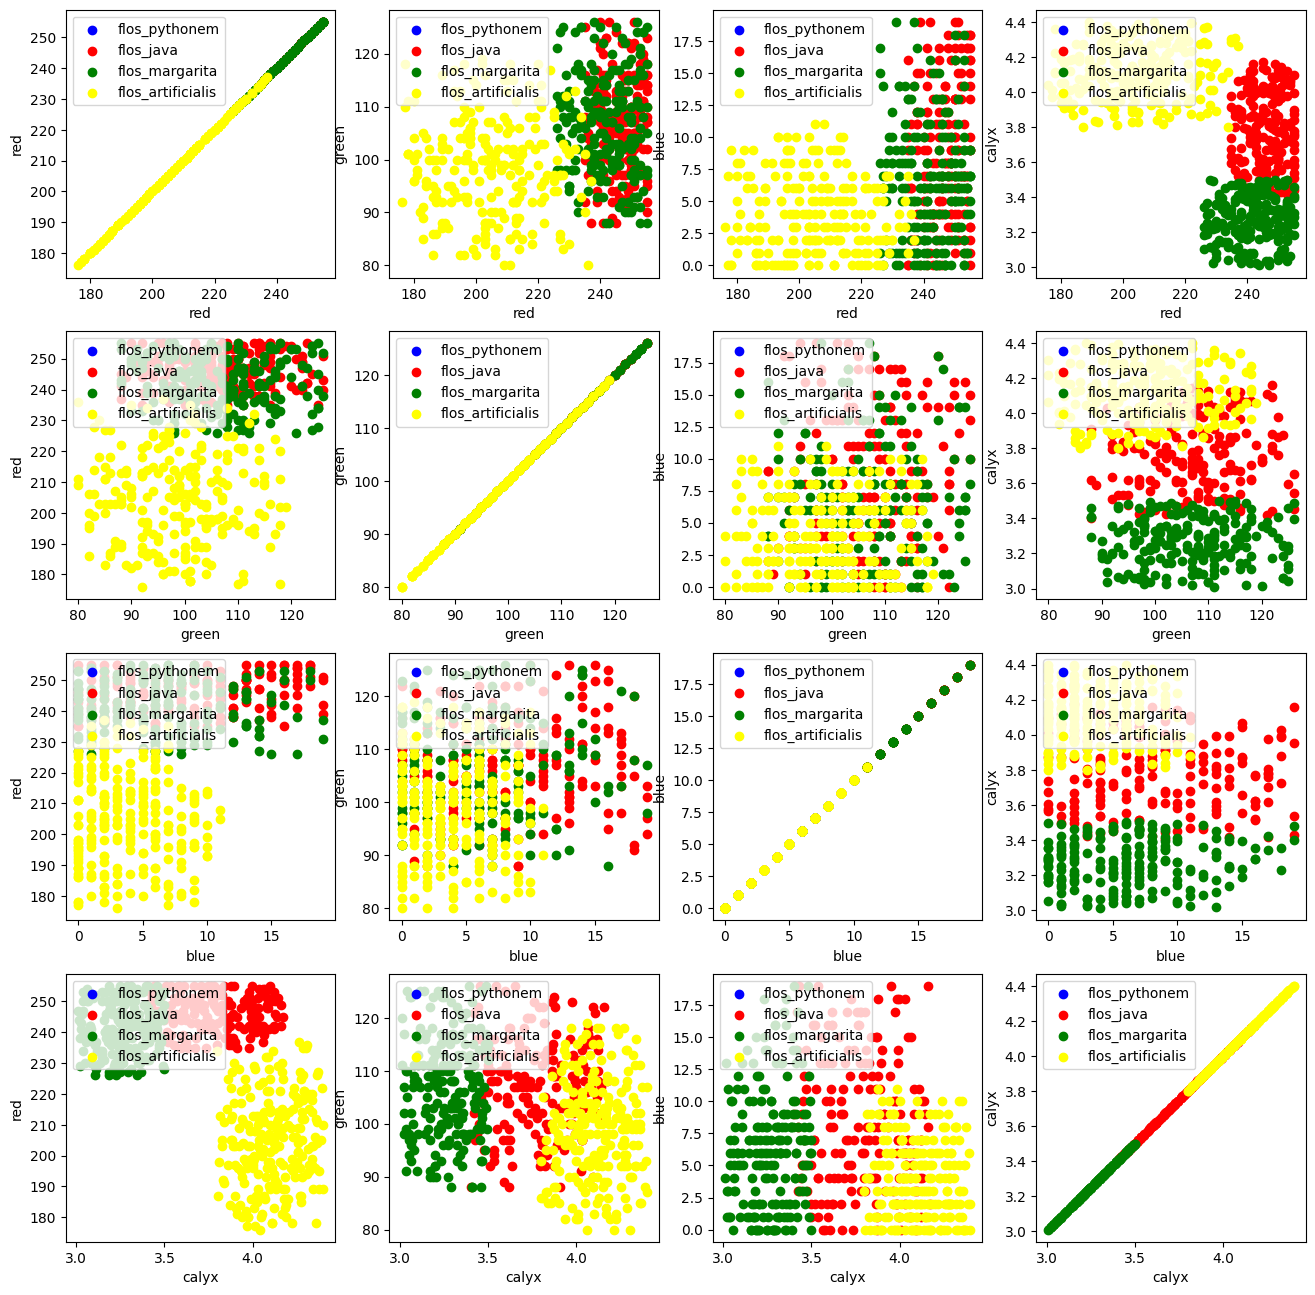

In [16]:
import matplotlib.pyplot as plt
target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green', 'yellow']

for x in range(n):
  for y in range(n):
    xname = feature_names[x]
    yname = feature_names[y]
    for color_ind in range(len(target_names)):
      ax[x, y].scatter(data[target==color_ind, x],data[target==color_ind, y],label=target_names[color_ind],c=colors[color_ind])
    ax[x, y].set_xlabel(xname)
    ax[x, y].set_ylabel(yname)
    ax[x, y].legend(loc='upper left')
plt.show()